In [1]:
%reload_ext autoreload
%autoreload 2
import json
import logging
import numpy as np
import pandas as pd
import networkx as nx
from pyeed import Pyeed
import matplotlib.pyplot as plt

from pyeed.analysis.network_analysis import NetworkAnalysis

/home/nab/anaconda3/envs/pyeed_niklas/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
LOGGER = logging.getLogger(__name__)

In [3]:
from dotenv import load_dotenv
import os

load_dotenv()  # Load variables from .env
password = os.getenv("NEO4J_NIKLAS_JUST_TEMS")
if password is None:
    raise ValueError("KEY is not set in the .env file.")


In [4]:
uri = "bolt://127.0.0.1:1123"
user = "neo4j"      

# Create a Pyeed object, automatically connecting to the database
eedb = Pyeed(uri, user, password)

📡 Connected to database.


In [5]:
# read in the pandas dataframe
df = pd.read_csv('/home/nab/Niklas/TEM-lactamase/data/002_combined_data/TEM_lactamase.csv', sep=';')
print(df.head())

   Unnamed: 0 protein_name phenotype    protein_id protein_id_database
0           0        TEM-1        2b      AAP20891          AAP20891.1
1           1        TEM-2        2b      CAJ85677          CAJ85677.1
2           2        TEM-3       2be      SAQ02853          SAQ02853.1
3           3        TEM-4       2be      CDR98216          CDR98216.1
4           4        TEM-5       2be  WP_109963600      WP_109963600.1


In [6]:
# i want to check if the phenotype in the dataframe is ever ? if so change it to nan
df['phenotype'] = df['phenotype'].apply(lambda x: np.nan if x == '?' else x)


In [7]:
na = NetworkAnalysis(db = eedb.db)
data_list = df['protein_id_database'].tolist()
# remove AAM52207.1 from the list
data_list = [i for i in data_list if i != 'AAM52207.1']
graph = na.create_graph(ids = data_list)

2025-01-13 11:24:13,281 - INFO - Creating graph with node types: None and relationships: None and ids: ['AAP20891.1', 'CAJ85677.1', 'SAQ02853.1', 'CDR98216.1', 'WP_109963600.1', 'CAA41038.1', 'WP_109874025.1', 'CAA46344.1', 'APG33178.1', nan, 'AKC98298.1', 'KJO56189.1', nan, nan, 'KLP91446.1', 'CAA46346.1', 'CAA74912.2', nan, 'AFN21551.1', 'ACB22021.1', 'CAA76794.1', 'CAA76795.1', nan, 'CCG28759.1', nan, 'KLG19745.1', nan, 'AAC32891.1', 'CAA76796.1', 'CAD24670.1', 'ARF45649.1', 'CTA52364.1', 'ADL13944.1', 'AGQ50511.1', 'AKA60778.1', 'APT65830.1', 'HAH6232254.1', nan, 'QDO66746.1', 'CBX53726.1', nan, nan, 'AAC32889.2', nan, 'CAA64682.1', nan, 'CAA71322.1', 'CAA71323.1', 'CAA71324.1', nan, nan, 'AEC32455.1', 'AAD22538.1', 'AAD22539.1', 'ABB97007.1', nan, 'ACJ43254.1', nan, nan, 'AAC05975.1', 'BCD58813.1', nan, 'AAK17194.1', nan, nan, nan, 'AAD33116.2', 'CAB92324.1', nan, 'AAF01046.1', 'AAL03985.1', 'AAF19151.1', nan, nan, nan, 'AAF05613.1', 'AAF05614.1', 'AAF05612.1', 'AAF05611.1', 'AAM1

2025-01-13 11:24:13,957 - INFO - Executing query: 
        MATCH (n)-[r]->(m)
        
        RETURN ID(n) as source, ID(m) as target, type(r) as type, properties(r) as properties
        
2025-01-13 11:24:24,765 - INFO - Number of nodes: 208
2025-01-13 11:24:24,768 - INFO - Number of relationships: 163038


In [8]:
# get all unique phenotypes and assign a color to each
phenotypes = df['phenotype'].unique()
print(phenotypes)
# With this:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
phenotype_colors = {phenotype: colors[i % len(colors)] for i, phenotype in enumerate(phenotypes)}

# add in the nodes Protein a new attribute called 'name_tem'
for node in graph.nodes(data=True):
    # create the name_tem attribute
    name_tem = df[df['protein_id_database'] == node[1]['properties']['accession_id']].values[0][1]
    graph.nodes[node[0]]['properties']['name_tem'] = name_tem
    graph.nodes[node[0]]['properties']['color'] = phenotype_colors[df[df['protein_id_database'] == node[1]['properties']['accession_id']].values[0][2]]
    graph.nodes[node[0]]['properties']['phenotype'] = df[df['protein_id_database'] == node[1]['properties']['accession_id']].values[0][2]

['2b' '2be' nan '2br' '2ber' 'ESBL']


In [9]:
print(list(graph.nodes(data=True))[0])

(1, {'labels': ['Protein'], 'properties': {'nucleotide_id': 'AY263331.1', 'totalMutations': 552, 'sequence': 'MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW', 'nucleotide_end': 1044, 'name': 'beta-lactamase TEM-1', 'accession_id': 'AAP20891.1', 'seq_length': 286, 'embedding': [0.0599873848259449, -0.05773390084505081, -0.016536690294742584, 0.0010012425482273102, -0.02191118709743023, -0.024847080931067467, -0.020893467590212822, -0.06540296971797943, -0.05788902938365936, -0.014951825141906738, -0.011958475224673748, -0.022730425000190735, 0.12200891971588135, 0.11928006261587143, -0.07654095441102982, 0.13297916948795319, -0.009836462326347828, 0.02206258289515972, 0.025648199021816254, -0.014893753454089165, 0.05179257690906525, -0.062427978962659

In [10]:
# next we are interested in the mutational graph, where each edge represents a single mutation
# since we want to use the NetworkAnalysis class, we need to create a new graph
# but we need to add the edges manually
# graph is a networkx graph

# load the mutation data
distance_matrix_mutations = np.load("/home/nab/Niklas/TEM-lactamase/data/002_combined_data/distance_matrix_mutations.npy")
protein_ids_mutations = np.load("/home/nab/Niklas/TEM-lactamase/data/002_combined_data/protein_ids_mutations.npy")

# the existing graph needs to be changed
for i in range(len(protein_ids_mutations)):
    for j in range(len(protein_ids_mutations)):
        if i != j:
            id_i = protein_ids_mutations[i]
            id_j = protein_ids_mutations[j]
            print(id_i, id_j)
            # find the id of the node in the graph
            node_i = [i for i in list(graph.nodes(data=True)) if i[1]['properties']['accession_id'] == id_i]
            node_j = [i for i in list(graph.nodes(data=True)) if i[1]['properties']['accession_id'] == id_j]
            if len(node_i) > 0 and len(node_j) > 0:
                graph.add_edge(node_i[0][0], node_j[0][0], type='MUTATION', properties={'number_mutations': distance_matrix_mutations[i, j]})



AAP20891.1 CAJ85677.1
AAP20891.1 SAQ02853.1
AAP20891.1 CDR98216.1
AAP20891.1 WP_109963600.1
AAP20891.1 CAA41038.1
AAP20891.1 WP_109874025.1
AAP20891.1 CAA46344.1
AAP20891.1 APG33178.1
AAP20891.1 AKC98298.1
AAP20891.1 KJO56189.1
AAP20891.1 KLP91446.1
AAP20891.1 CAA46346.1
AAP20891.1 CAA74912.2
AAP20891.1 AFN21551.1
AAP20891.1 ACB22021.1
AAP20891.1 CAA76794.1
AAP20891.1 CAA76795.1
AAP20891.1 CCG28759.1
AAP20891.1 KLG19745.1
AAP20891.1 AAC32891.1
AAP20891.1 CAA76796.1
AAP20891.1 CAD24670.1
AAP20891.1 ARF45649.1
AAP20891.1 CTA52364.1
AAP20891.1 ADL13944.1
AAP20891.1 AGQ50511.1
AAP20891.1 AKA60778.1
AAP20891.1 APT65830.1
AAP20891.1 HAH6232254.1
AAP20891.1 QDO66746.1
AAP20891.1 CBX53726.1
AAP20891.1 AAC32889.2
AAP20891.1 CAA64682.1
AAP20891.1 CAA71322.1
AAP20891.1 CAA71323.1
AAP20891.1 CAA71324.1
AAP20891.1 AEC32455.1
AAP20891.1 AAD22538.1
AAP20891.1 AAD22539.1
AAP20891.1 ABB97007.1
AAP20891.1 ACJ43254.1
AAP20891.1 AAC05975.1
AAP20891.1 BCD58813.1
AAP20891.1 AAK17194.1
AAP20891.1 AAD33116.2


In [11]:
print([i for i in list(graph.edges(data=True)) if i[2]['type'] == 'MUTATION'][4])
# print(list(graph.edges(data=True))[500])
a = [i for i in list(graph.nodes(data=True)) if i[0] == 1]
b = [i for i in list(graph.nodes(data=True)) if i[0] == 101]
print(a[0][1]['properties']['accession_id'], a[0][0])
print(b[0][1]['properties']['accession_id'], b[0][0])
c = [i for i in range(len(protein_ids_mutations)) if protein_ids_mutations[i] == a[0][1]['properties']['accession_id']][0]
d = [i for i in range(len(protein_ids_mutations)) if protein_ids_mutations[i] == b[0][1]['properties']['accession_id']][0]
print(protein_ids_mutations[c], protein_ids_mutations[d])
print(distance_matrix_mutations[c, d])

(1, 10, {'type': 'MUTATION', 'properties': {'number_mutations': np.float64(3.0)}})
AAP20891.1 1
AAM52215.1 101
AAP20891.1 AAM52215.1
4.0


In [12]:
graph = na.graph

In [13]:
def find_isolated_nodes(graph):
        """
        Finds isolated nodes in the graph.
        """
        return [node for node in graph if graph.degree(node) == 0]
    
def find_self_referential_nodes(graph, relationship_type):
    """
    Finds all nodes in the graph that only have self-referential edges
    of a specified relationship type.

    Args:
        relationship_type (str): The relationship type to consider.

    Returns:
        list[tuple]: A list of tuples representing the self-referential edges,
                    where each tuple is (node, node, edge_data).
    """
    removed_edges = []

    for node in list(graph.nodes):  # Use list to avoid mutation issues
        # Get all edges connected to the node
        edges = [
            (u, v, d)
            for u, v, d in graph.edges(node, data=True)
            if d.get("type") == relationship_type
        ]

        # Separate self-referential edges and others
        self_edges = [(u, v, d) for u, v, d in edges if u == v]
        other_edges = [(u, v, d) for u, v, d in edges if u != v]

        # If there are other edges, remove self-referential ones
        if other_edges and self_edges:
            for u, v, d in self_edges:
                removed_edges.append((u, v, d))

    return removed_edges

In [14]:
# na.visualize_force_directed_graph('number_mutations', scale = 3, threshold = 1, show = True, type_relationship='MUTATION', save=False, mode='HIDE_OVER_THRESHOLD')

attribute='number_mutations'
scale=1.0
threshold=1
path=None
mode="HIDE_OVER_THRESHOLD"
show=True
save=False
type_relationship='MUTATION'

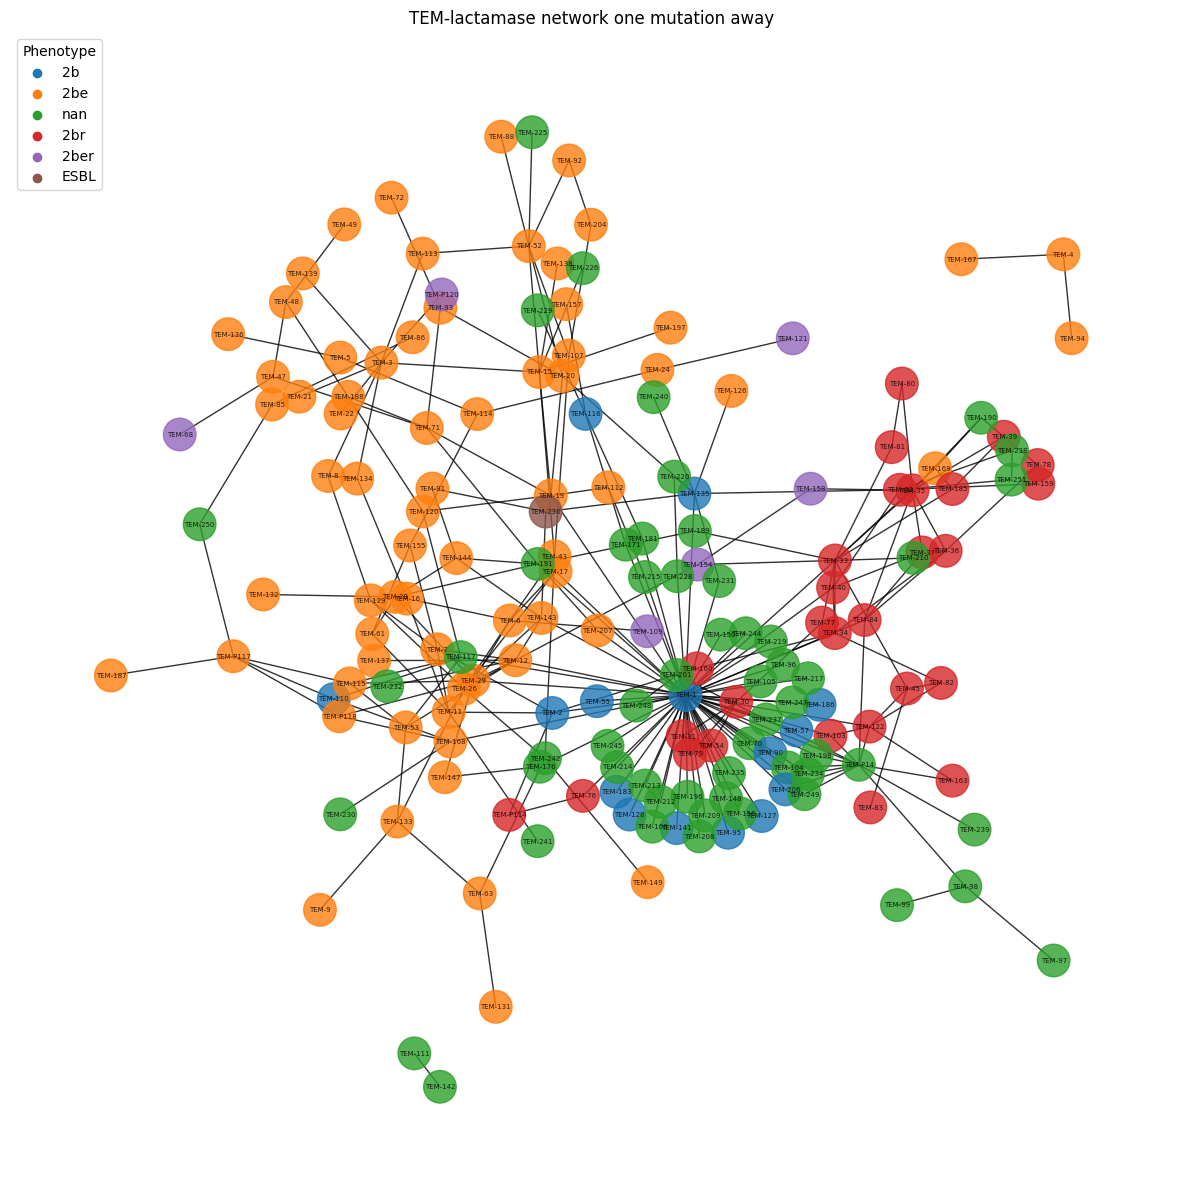

In [15]:
# Filter edges based on the threshold
edges = graph.edges(data=True)
edges_filtered = []

if threshold is not None and attribute is not None:
    for edge in edges:
        if mode == "HIDE_UNDER_THRESHOLD":
            if type_relationship is not None:
                if edge[2]['type'] == type_relationship:
                    if edge[2]['properties'][attribute] >= threshold:
                        edges_filtered.append(edge)
            else:
                if edge[2]['properties'][attribute] >= threshold:
                    edges_filtered.append(edge)
        elif mode == "HIDE_OVER_THRESHOLD":
            if type_relationship is not None:
                if edge[2]['type'] == type_relationship:
                    if edge[2]['properties'][attribute] <= threshold:
                        edges_filtered.append(edge)
            else:
                if edge[2]['properties'][attribute] <= threshold:
                    edges_filtered.append(edge)


# Extract filtered graph
filtered_graph = nx.Graph()
filtered_graph.add_nodes_from(graph.nodes(data=True))
filtered_graph.add_edges_from(edges_filtered)

# Find self-referential nodes
self_referential_edges = find_self_referential_nodes(filtered_graph, type_relationship)
filtered_graph.remove_edges_from(self_referential_edges)

# Find isolated nodes
isolated_nodes = find_isolated_nodes(filtered_graph)
filtered_graph.remove_nodes_from(isolated_nodes)

# Use spring layout for force-directed graph
pos = nx.spring_layout(filtered_graph, weight=attribute, scale=scale, k=0.18, iterations=50, seed=123)

    # Prepare edge attributes and node labels for visualization
edge_weights = nx.get_edge_attributes(filtered_graph, attribute) if attribute else {}
node_labels = {n: data["properties"].get("name_tem", n) for n, data in filtered_graph.nodes(data=True)}

# Plot graph with Matplotlib
plt.figure(figsize=(15, 15))

# Draw edge labels if attribute is provided
if attribute:
    nx.draw_networkx_edge_labels(filtered_graph, pos, edge_labels=edge_weights)

nx.draw(
    filtered_graph,
    pos,
    with_labels=True,
    labels=node_labels,
    node_size=550,
    alpha=0.8,
    font_size=5,
    edge_color="black",
    node_color=[filtered_graph.nodes[node]['properties']['color'] for node in filtered_graph.nodes()]
)

plt.legend([plt.scatter([], [], c=color) for color in phenotype_colors.values()], phenotype_colors.keys(), title="Phenotype", loc="upper left")

plt.title("TEM-lactamase network one mutation away")
if save:
    plt.savefig(path)
if show:
    plt.show()
